In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fig.savefig('s0513_15 IF comparison.png')

# Magnetic Fields

In [28]:
data=np.loadtxt(open('s0506_15_averaged_Bfield_and_neL_lineout_vs_y_(t_214ns_zav_over_12p5mm).dat',"r"),delimiter=",")
y_B=data[:,0]
B=data[:,1]
ne=data[:,2]

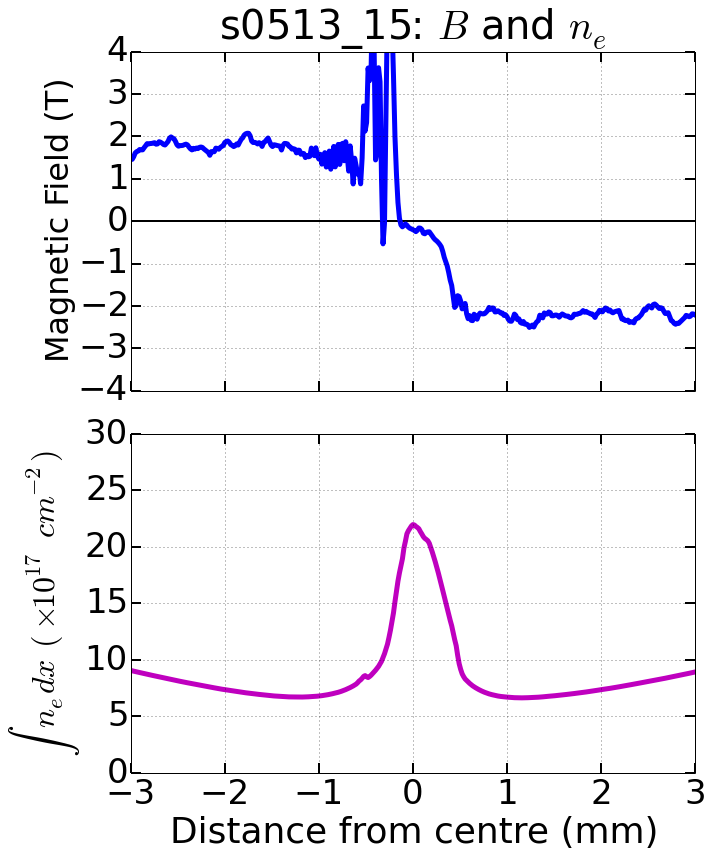

In [6]:
fig, (ax1,ax2)= plt.subplots(2, sharex=True, figsize=(10,12))

plot_line=ax1.plot([-3, 3], [0, 0], color='k', linewidth=2)
plot_B=ax1.plot(y,B, label='Magnetic Field', color='b', lw=5)
plot_ne=ax2.plot(y,ne/1e17, lw=5, color='m', label='Electron Density')

ax1.set_xlim([-3,3])
ax1.set_xticks(np.arange(-3,3+1,1))
ax2.set_xlabel('Distance from centre (mm)', fontsize=36)
ax1.set_ylim([-4,4])
#ax1.set_yticks(np.arange(-8,9,4))
ax1.set_ylabel('Magnetic Field (T)',fontsize=32)

ax2.set_ylim([0,30])
#ax2.set_yticks(np.arange(0,9,2))

ax2.set_ylabel(r'$\int \,n_e dx \,(\times 10^{17}\,cm^{-2})$',fontsize=32)
ax1.tick_params(labelsize=34, pad=5, length=10, width=2)
ax2.tick_params(labelsize=34, pad=5, length=10, width=2)
ax1.set_title(r's0513_15: $B$ and $n_e$',fontsize=40, y=1.02)
ax1.grid()
ax2.grid()
fig.tight_layout()

In [ ]:
fig.savefig('s0513_15 b and ne.png')

# Bring in TS Data from s0611_15

In [29]:
from plasma_parameter_calculator import *
#fibre,ypos,xpos,Ne,dNe,vlayer,dv,Ti,dTi,ZTe,Z,Te,dZTe,Fibre,vflow,dv,,
plas_params=np.genfromtxt(open('s0609_15 TS fits.dat',"r"),delimiter=",", skiprows=2, missing_values='--')
n_e=plas_params[:,3]
T_e=plas_params[:,11]
Z=plas_params[:,10]
T_i=plas_params[:,7]

V=plas_params[:,6]
y_TS=plas_params[:,1]
B_TS=np.interp(y_TS, y_B, B)
pp=Plasma(A=27,Z=Z,n_e=n_e,T_e=T_e,T_i=T_i,B=B_TS, V=V*1e5,L=1.0)

In [43]:
pp.T_i

array([  28.5,  150. ,  300. ,  280. ,  265. ,  180. ,   45. ,   28.5,
         26.5,   22.5,   30. ,   22. ,   13. ,    nan])

# Harris Sheet

In [25]:
from lmfit import Model
def Harris(y, B0, L, C):
    return B0*np.tanh(y/L)+C

[[Model]]
    Model(Harris)
[[Fit Statistics]]
    # function evals   = 29
    # data points      = 501
    # variables        = 3
    chi-square         = 173.388
    reduced chi-square = 0.348
[[Variables]]
    C:    0.01795145 +/- 0.026364 (146.86%) (init= 0)
    B0:  -1.96858242 +/- 0.028269 (1.44%) (init=-2)
    L:    0.23931218 +/- 0.029296 (12.24%) (init= 0.25)
[[Correlations]] (unreported correlations are <  0.100)
    C(B0, L)                     = -0.273 


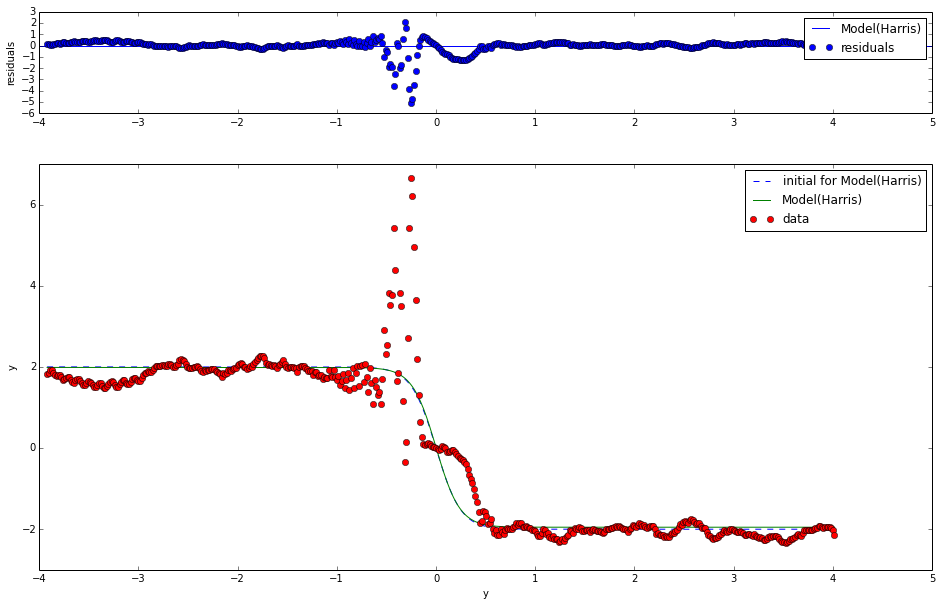

In [38]:
hm=Model(Harris, independent_vars='y')
hm.set_param_hint('B0', value = -2.0)
hm.set_param_hint('L', value = 0.25)
hm.set_param_hint('C', value = 0)
res=hm.fit(B+0.2, y=y_B)
L_fit=res.best_values['L']
B0_fit=res.best_values['B0']
res.plot(fig_kws={'figsize':(16,10)})
print res.fit_report()

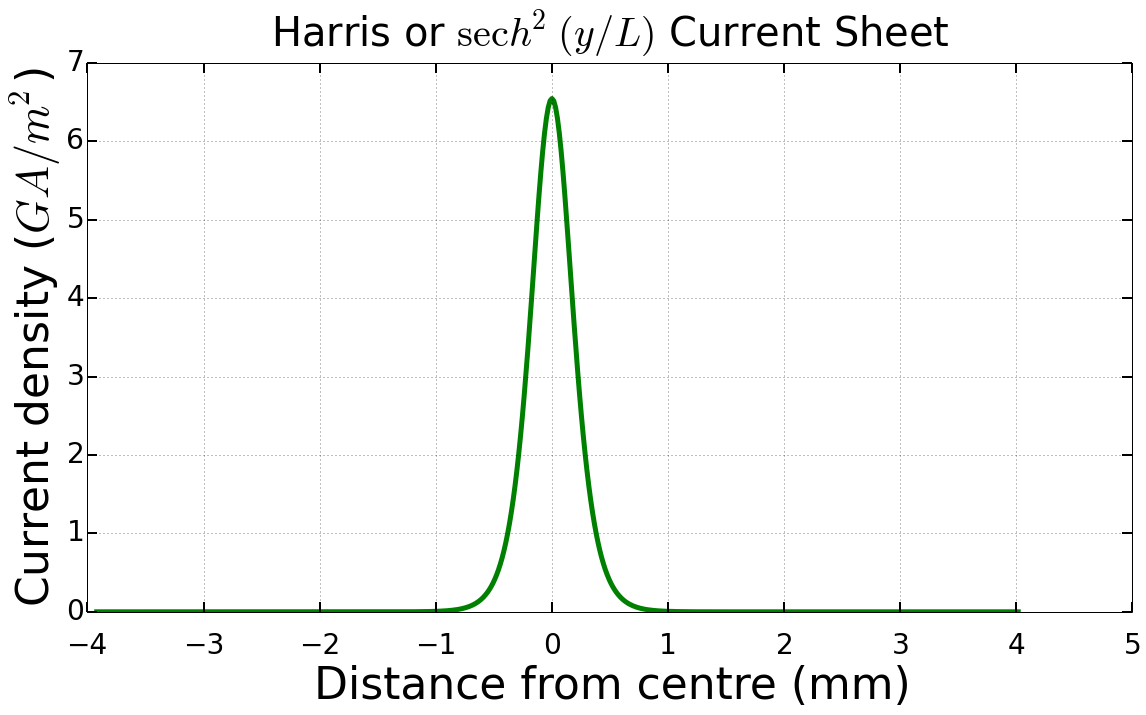

In [31]:
import scipy.constants as c
j=B0_fit/(c.mu_0*(L_fit*1e-3)*(np.cosh(y_B/L_fit))**2)
j_TS=np.interp(y_TS, y_B, j)
u_e=-j_TS/(c.e*(n_e*1e6))
V_Ti=9.79e3*((Z*T_e+T_i)/12)**0.5

fig, ax1=plt.subplots(figsize=(16,10))

plot_j=ax1.plot(y_B,-j/1e9, color='green', label='Electron Velocity', lw=5,)

ax1.set_xlabel('Distance from centre (mm)', fontsize=44)
ax1.set_ylabel(r'Current density ($GA/m^{2}$)',fontsize=44)
ax1.tick_params(labelsize=28, pad=5, length=10, width=2)
ax1.tick_params(axis='x',pad=20)
ax1.set_title(r'Harris or $\sech ^2(y/L)$ Current Sheet',fontsize=40, y=1.02, )

ax1.grid()
fig.tight_layout()

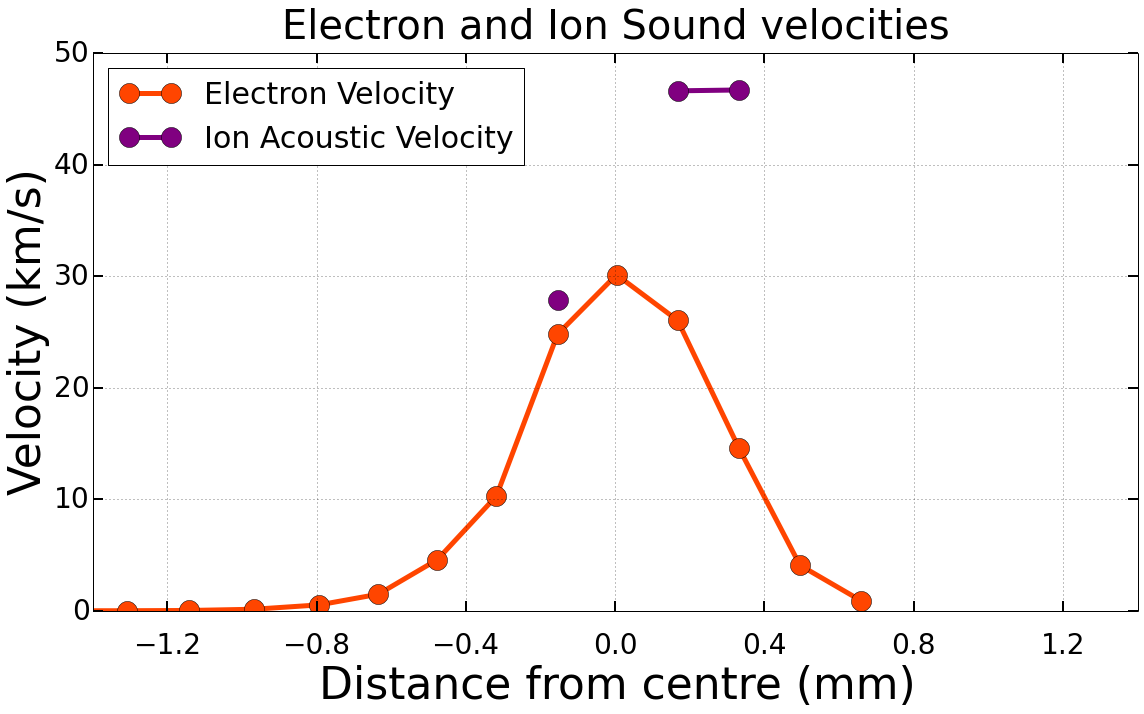

In [39]:
fig, ax1=plt.subplots(figsize=(16,10))

plot_u_e=ax1.plot(y_TS,u_e/1e3, color='orangered', label='Electron Velocity', lw=5,marker='o', markersize=20)
plot_V_Ti=ax1.plot(y_TS,pp.V_S/1e5, lw=5, color='purple',label='Ion Acoustic Velocity',marker='o', markersize=20)

ax1.set_xlim([-1.4,1.4])
ax1.set_xticks(np.arange(-1.2,1.3,0.4))
ax1.set_xlabel('Distance from centre (mm)', fontsize=44)
ax1.set_ylim([0,50])
#ax1.set_yticks(np.arange(-50,51,25))
ax1.set_ylabel('Velocity (km/s)',fontsize=44)
ax1.tick_params(labelsize=28, pad=5, length=10, width=2)
ax1.tick_params(axis='x',pad=20)
ax1.set_title(r'Electron and Ion Sound velocities',fontsize=40, y=1.02, )
ax1.legend(fontsize=30, loc=2)
ax1.grid()
fig.tight_layout()

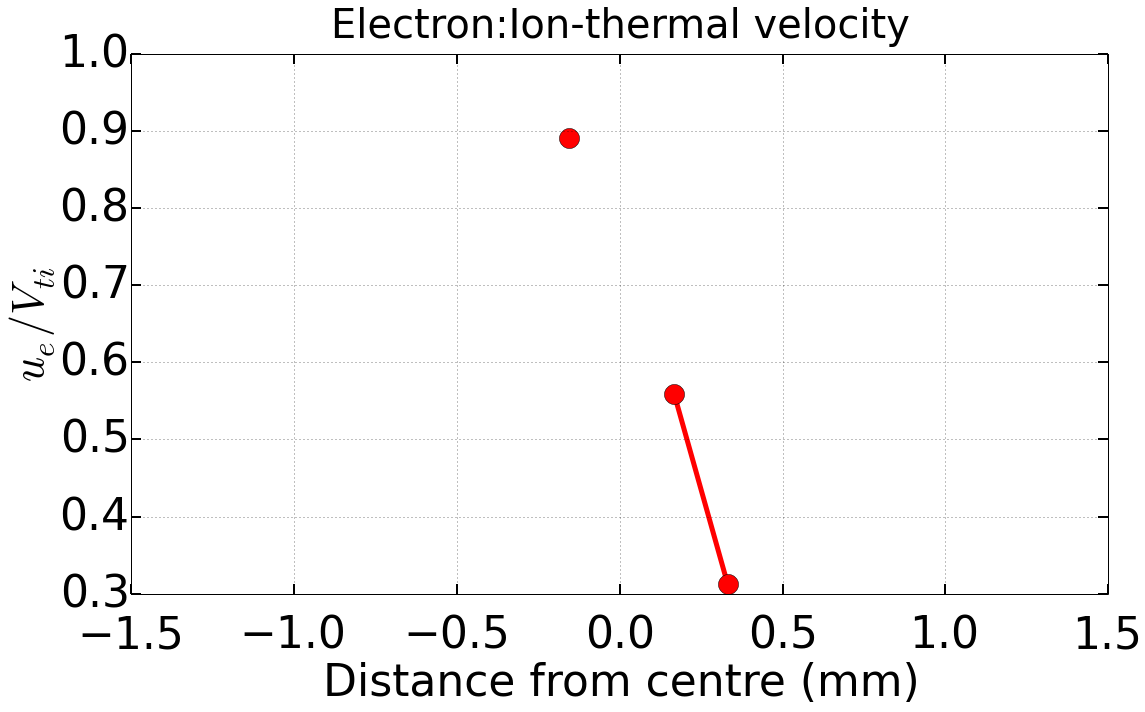

In [44]:
fig, ax1=plt.subplots(figsize=(16,10))

plot_rat=ax1.plot(y_TS,u_e/(pp.V_S*1e-2), color='red', lw=5,marker='o', markersize=20)
plot_line=ax1.plot([-1.5, 1.5], [1, 1], color='k', linewidth=2, ls='-.')


ax1.set_xlabel('Distance from centre (mm)', fontsize=44)
ax1.set_ylabel(r'$u_e/V_{ti}$',fontsize=44)
ax1.tick_params(labelsize=44, pad=5, length=10, width=2)
ax1.tick_params(axis='x',pad=20)
ax1.set_title(r'Electron:Ion-thermal velocity',fontsize=40, y=1.02, )

ax1.grid()
fig.tight_layout()

# Plasma Parameters

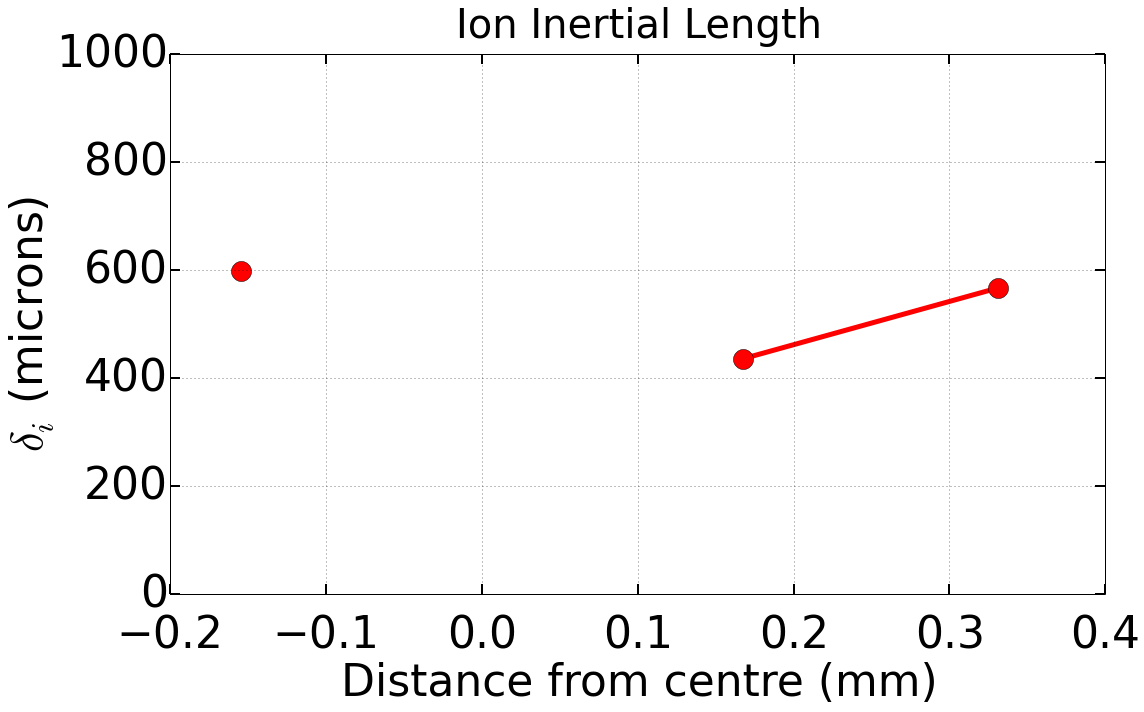

In [40]:
fig, ax1=plt.subplots(figsize=(16,10))

plot_ompe=ax1.plot(y_TS,pp.delta_i*1e4, color='red', lw=5,marker='o', markersize=20)

ax1.set_xlabel('Distance from centre (mm)', fontsize=44)
ax1.set_ylabel(r'$\delta_i$ (microns)',fontsize=44)
ax1.tick_params(labelsize=44, pad=5, length=10, width=2)
ax1.tick_params(axis='x',pad=20)
ax1.set_title(r'Ion Inertial Length',fontsize=40, y=1.02, )
ax1.set_ylim([0,1000])


ax1.grid()
fig.tight_layout()

In [138]:
B_TS_harris=np.interp(y_TS, y_B, res.best_fit) #use Harris sheet for smoothness
p=Plasma(A=12,Z=Z[8],n_e=n_e[8],T_e=T_e[8],T_i=T_i[8],B=6.2, V=5e6,L=0.009)
p.Rm

1.0060295119563516

# Energy Balance

In [26]:
dy=(y_TS[1]-y_TS[0])*1e-3#dy in metres
y_interp=(y_TS+np.roll(y_TS,1))/2.0
y_interp=y_interp[1:]
B_TS_Harris=np.interp(y_TS, y_B, res.best_fit)
magnetic_power_in=B_TS_Harris**2*V/(2*c.mu_0)#Magnetic energy flux per unit area perpendicular to flow.
j_interp=np.interp(y_interp, y_B, j)
eta_interp=np.interp(y_interp, y_TS, pp.eta_perp)
ohmic_heating=1e-2*eta_interp*j_interp**2*dy#eta j**2 is power puv, *dy for puA
mpi_diff=np.diff(magnetic_power_in)

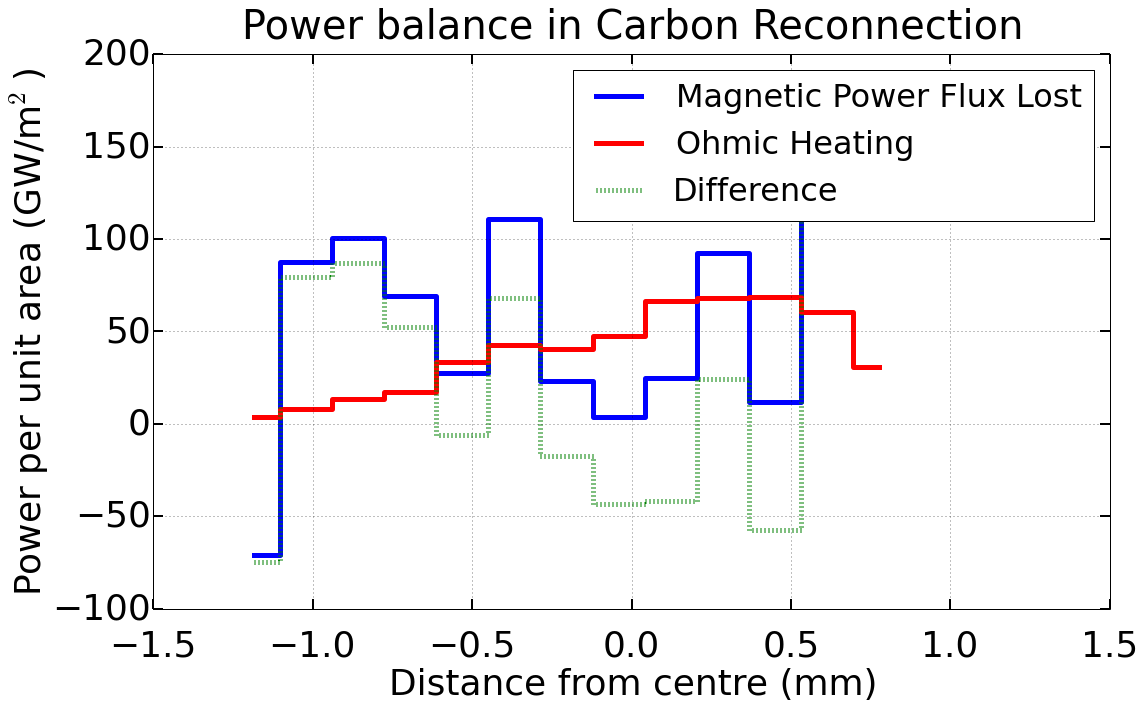

In [62]:
fig, ax1=plt.subplots(figsize=(16,10))
#plot_mpi=ax1.plot(y_TS,magnetic_power_in, color='blue', lw=5,marker='o', markersize=20)
#plot_oh=ax1.plot(y_TS,ohmic_heating, color='red', lw=5,marker='o', markersize=20)
#plot_eta_perp=ax1.plot(y_TS,j_TS, color='blue', lw=5,marker='o', markersize=20)
plot_mpi=ax1.step(y_interp,-mpi_diff/1e9, color='blue', lw=5, where='mid', label='Magnetic Power Flux Lost')
plot_oh=ax1.step(y_interp,ohmic_heating/1e9, color='red', lw=5, label='Ohmic Heating', where='mid')
plot_diff=ax1.step(y_interp,(-mpi_diff-ohmic_heating)/1e9, color='green', lw=5, ls=':', label='Difference', where='mid')


ax1.set_xlabel('Distance from centre (mm)', fontsize=36)
ax1.set_ylabel(r'Power per unit area (GW/m$^2$)',fontsize=36)
ax1.tick_params(labelsize=36, pad=5, length=10, width=2)
ax1.tick_params(axis='x',pad=20)
ax1.set_title(r'Power balance in Carbon Reconnection',fontsize=40, y=1.02, )
#ax1.set_ylim([0,200])
ax1.set_xlim([-1.5,1.5])
ax1.legend(fontsize=32)
ax1.grid()
fig.tight_layout()

In [55]:
'''
Compare the magnetic poweer flux into a 'volume' as V*B^2 with the ohmic power that volume can disapate.
'''
eta_full=np.interp(y_B, y_TS, pp.eta_perp)
V_full=np.interp(y_B, y_TS, V)
B_har=res.best_fit
magnetic_power_in_full=B_har**2*V_full/(2*c.mu_0)#Magnetic energy flux per unit area perpendicular to flow.
ohmic_heating_full=1e-2*eta_full*j**2#eta j**2 is power puv, *dy for puA

y_0_ind=np.where(y_B>=0)[0][0]
y_half=y_B[1:y_0_ind]
oh_dis=np.zeros_like(y_half)
mp_in=np.zeros_like(y_half)
for y_ind, y in enumerate(y_half):
    y_left=y_ind
    y_right=np.where(y_B>-y)[0][0]
    oh_dis[y_ind]=np.trapz(ohmic_heating_full[y_left:y_right], x=y_B[y_left:y_right]*1e-3)
    mp_in[y_ind]=magnetic_power_in_full[y_left]-magnetic_power_in_full[y_right]

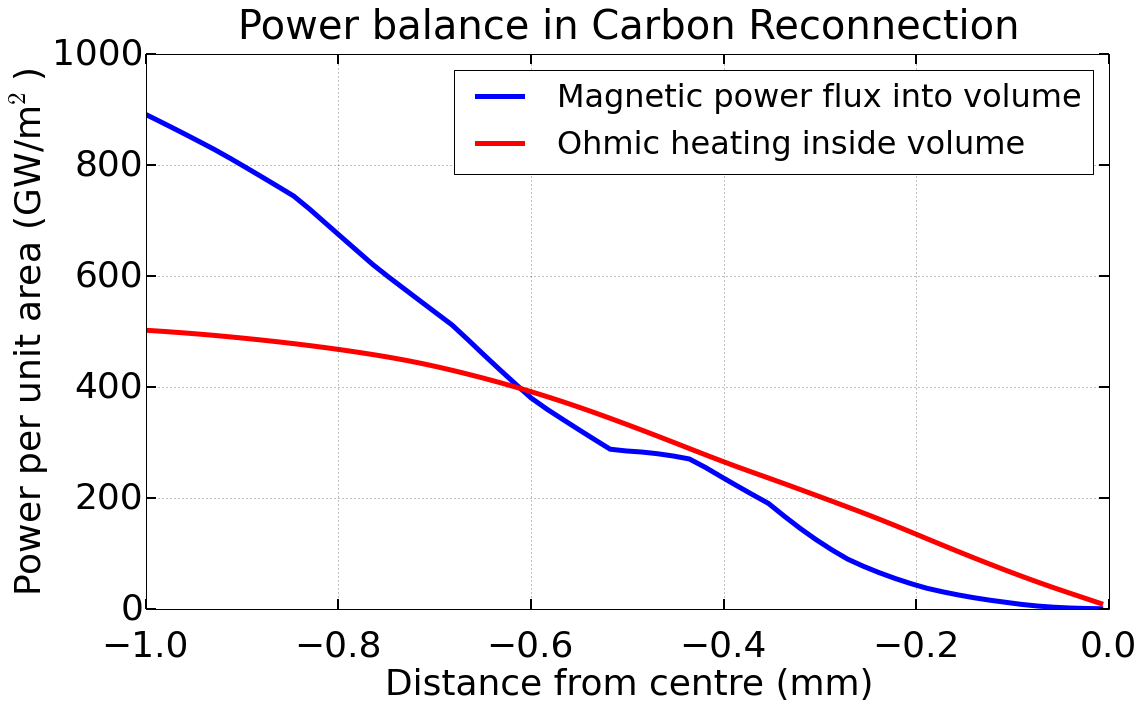

In [87]:
fig, ax1=plt.subplots(figsize=(16,10))

plot_mpi=ax1.plot(y_half,mp_in/1e9, color='blue', lw=5, label='Magnetic power flux into volume')
plot_oh=ax1.plot(y_half,oh_dis/1e9, color='red', lw=5, label='Ohmic heating inside volume')
#plot_diff=ax1.plot(y_half,(mp_in-oh_dis)/mp_in, color='green', lw=5, ls=':',label='Discrepancy')

ax1.set_xlabel('Distance from centre (mm)', fontsize=36)
ax1.set_ylabel(r'Power per unit area (GW/m$^2$)',fontsize=36)
ax1.tick_params(labelsize=36, pad=5, length=10, width=2)
ax1.tick_params(axis='x',pad=20)
ax1.set_title(r'Power balance in Carbon Reconnection',fontsize=40, y=1.02, )
ax1.set_ylim([0,1000])
ax1.set_xlim([-1.0,0])
ax1.legend(fontsize=32)

ax1.grid()
fig.tight_layout()

In [120]:
V_1mm=32e3
y_1mm=np.where(y_B>-1)[0][0]
y_0=np.where(y_B>0)[0][0]

mag_fp_in_pua=res.best_fit[y_1mm]**2*V_1mm/(2*c.mu_0)
L_range=np.linspace(1e-5,1e-3, 10000)
oh_p_pua=np.zeros_like(L_range)

for Lind, L in enumerate(L_range):
    y=y_B*1e-3#convert to mm
    j=B0_fit/(c.mu_0*L*(np.cosh(y/L))**2)
    oh_p_puv=1e-2*eta_full*j**2
    oh_p_pua[Lind]=np.trapz(oh_p_puv[y_1mm:y_0], x=y[y_1mm:y_0])
    

In [121]:
L_ind=np.where(mag_fp_in_pua>oh_p_pua)[0][0]
print L_range[L_ind]*1e3, L_fit

0.225346534653 0.691610886128


In [122]:
oh_p_pua

array([  3.39607481e+12,   3.40432987e+12,   3.41142954e+12, ...,
         1.37897488e+11,   1.37884879e+11,   1.37872272e+11])

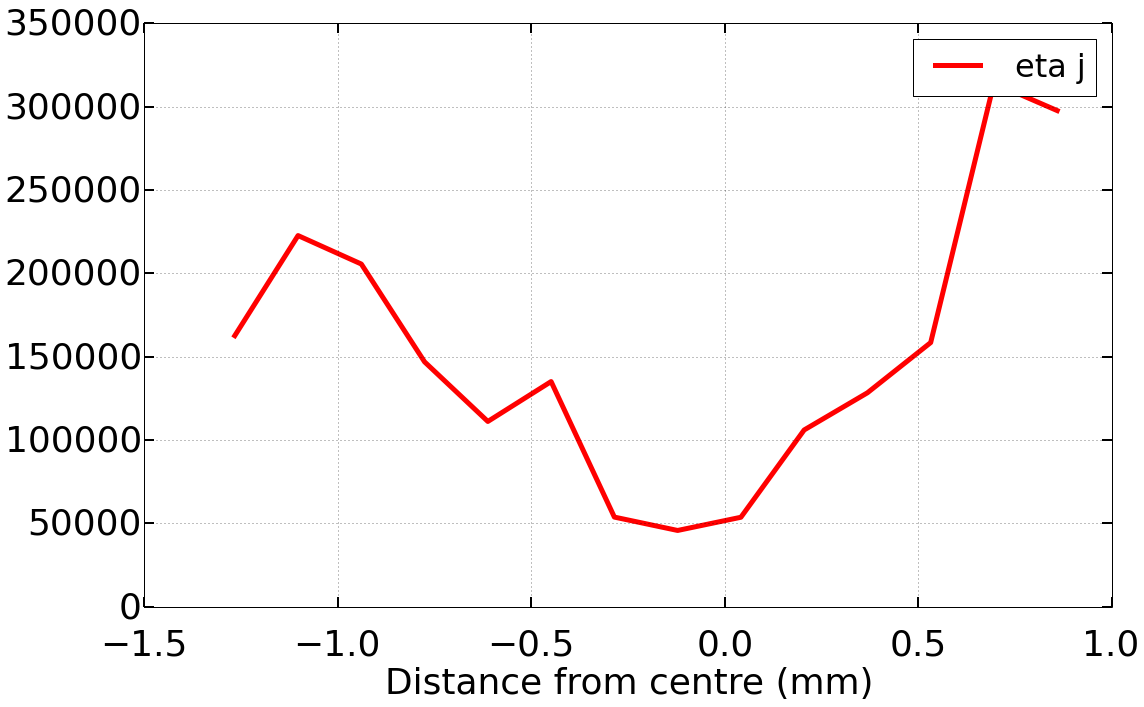

In [32]:
j_TS=np.interp(y_TS, y_B, j)

VB=pp.V*pp.B*1e-2
eta_j=j_TS*pp.eta_perp*1e-2
fig, ax1=plt.subplots(figsize=(16,10))

#plot_vb=ax1.plot(y_TS,VB, color='blue', lw=5, label='VxB')
plot_ej=ax1.plot(y_TS, VB-eta_j, color='red', lw=5, label='eta j')
#plot_diff=ax1.plot(y_half,(mp_in-oh_dis)/mp_in, color='green', lw=5, ls=':',label='Discrepancy')

ax1.set_xlabel('Distance from centre (mm)', fontsize=36)
#ax1.set_ylabel(r'Power per unit area (GW/m$^2$)',fontsize=36)
ax1.tick_params(labelsize=36, pad=5, length=10, width=2)
ax1.tick_params(axis='x',pad=20)
#ax1.set_title(r'Power balance in Carbon Reconnection',fontsize=40, y=1.02, )
#ax1.set_ylim([0,1000])
#ax1.set_xlim([-1.0,0])
ax1.legend(fontsize=32)

ax1.grid()
fig.tight_layout()

In [24]:
pp.V

array([ 2500000.,  3200000.,  2800000.,  2300000.,  2100000.,  2700000.,
        1100000.,   620000., -1600000., -2000000., -3200000., -2000000.,
       -3400000., -4100000.])